In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random
import seaborn as sns

In [4]:
def getScraped(url : str, htmlIdentifier : str, className : str):
    URL = url
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
        
    data = soup.find_all(htmlIdentifier, class_=className)
        
    return data

In [5]:
bookResults = getScraped("https://openlibrary.org/trending/forever", "a", "details")

In [104]:
authors = []
titles = []
publish = []
logs = []

for result in bookResults:
    titles.append(list(result)[1].text.strip())
    authors.append(list(result)[3].text.strip().replace("by", ""))
    publish.append(list(result)[5].text.split()[3])
    logs.append(list(result)[6].text.split()[1])    

In [119]:
books = {
    "Book Title" : titles,
    "Book Author" : authors,
    "Year Published" : publish,
    "Number of Logs" : logs
}

len(pd.DataFrame(books))

,Book Title,Book Author,Year Published,Number of Logs
0,Atomic Habits,James Clear,2016,41180
1,It Ends With Us,Colleen Hoover,2012,40566
2,The 48 Laws of Power,Robert Greene and Joost Elffers,1998,34986
3,The Subtle Art of Not Giving a F*ck,Mark Manson,2016,30182
4,Um casamento arranjado,Zana Kheiron,2019,23272
5,"Rich Dad, Poor Dad",Robert T. Kiyosaki and Sharon L. Lechter,1990,23002
6,Harry Potter and the Philosopher's Stone,J. K. Rowling,1997,15987
7,It Starts with Us,Colleen Hoover,2022,15547
8,Control Your Mind and Master Your Feelings,Eric Robertson - undifferentiated,2019,15511
9,Think and Grow Rich,Napoleon Hill,1937,11716


In [137]:
class GetBooks:
    def __init__(self, pages):
        self.authors = []
        self.titles = []
        self.publish = []
        self.logs = []
        for page in range(1, pages + 1):
            print(f"page {page} loading...")
            bookResults = self.getScraped(f"https://openlibrary.org/trending/forever?page={page}", "div", "details")
            for result in bookResults:
                self.titles.append(list(result)[1].text.strip())
                self.authors.append(list(result)[3].text.strip().replace("by", ""))
                self.publish.append(list(result)[5].text.split()[3])
                self.logs.append(list(result)[6].text.split()[1])
            print(f"page {page} finished!")
    
    def getBooks(self) -> dict:
        books = {
            "Book Title" : self.titles,
            "Book Author" : self.authors,
            "Year Published" : self.publish,
            "Number of Logs" : self.logs
        }
        return books

    def getScraped(self, url : str, htmlIdentifier : str, className : str):
        URL = url
        page = requests.get(URL)
        soup = BeautifulSoup(page.content, "html.parser")

        data = soup.find_all(htmlIdentifier, class_=className)

        return data

In [145]:
bookFinder = GetBooks(15)
books = pd.DataFrame(bookFinder.getBooks())

page 1 loading...
page 1 finished!
page 2 loading...
page 2 finished!
page 3 loading...
page 3 finished!
page 4 loading...
page 4 finished!
page 5 loading...
page 5 finished!
page 6 loading...
page 6 finished!
page 7 loading...
page 7 finished!
page 8 loading...
page 8 finished!
page 9 loading...
page 9 finished!
page 10 loading...
page 10 finished!
page 11 loading...
page 11 finished!
page 12 loading...
page 12 finished!
page 13 loading...
page 13 finished!
page 14 loading...
page 14 finished!
page 15 loading...
page 15 finished!


In [146]:
books

,Book Title,Book Author,Year Published,Number of Logs
0,Atomic Habits,James Clear,2016,41181
1,It Ends With Us,Colleen Hoover,2012,40568
2,The 48 Laws of Power,Robert Greene and Joost Elffers,1998,34986
3,The Subtle Art of Not Giving a F*ck,Mark Manson,2016,30182
4,Um casamento arranjado,Zana Kheiron,2019,23272
...,...,...,...,...
294,Marketing Management,Philip Kotler and Kevin Lane Keller,2016,951
295,"Heartstopper, Volume 2",Alice Oseman,2019,950
296,Influence,Robert B. Cialdini,1983,947
297,The Name of the Wind,Patrick Rothfuss,2007,940


In [176]:
books["Year Published"] = pd.to_numeric(books["Year Published"], errors="coerce")
books["Number of Logs"] = pd.to_numeric(books["Number of Logs"], errors="coerce")
earlyBooks = {}
for i in range(0, len(books["Year Published"])):
    year = books.loc[i]["Year Published"]
    title = books.loc[i]["Book Title"]
    logs = books.loc[i]["Number of Logs"]
    if(year >= 1800 and year <= 1900 and not title in earlyBooks):
        earlyBooks.update({title : [year, logs]})
        
print(earlyBooks)

{'Pride and Prejudice': [1813, 4725], 'Diary of a Wimpy Kid': [1900, 4652], 'The Art of War': [1900, 3421], 'The Adventures of Sherlock Holmes [12 stories]': [1892, 2617], 'Little Women': [1848, 2196], 'The Catcher in the Rye': [1900, 2187], 'Wuthering Heights': [1847, 2132], 'Frankenstein or The Modern Prometheus': [1818, 1603], 'The Invisible Man': [1897, 1536], "Alice's Adventures in Wonderland": [1865, 1521], 'Dracula': [1897, 1380], 'Moby Dick': [1851, 1350], 'कामसूत्र': [1883, 1306], 'The Picture of Dorian Gray': [1890, 1258], 'A Tale of Two Cities': [1800, 1229], 'Adventures of Huckleberry Finn': [1876, 1153], 'The Wonderful Wizard of Oz': [1900, 1115], 'The Strange Case of Dr. Jekyll and Mr. Hyde': [1875, 1079], 'The Time Machine': [1895, 1078], 'Le Comte de Monte Cristo': [1830, 1076], 'Jane Eyre': [1847, 1030], 'Alice in Wonderland in Five Acts': [1897, 1008], 'The War of the Worlds': [1898, 988], 'Guess How Much I Love You': [1839, 979]}


In [159]:
import numpy as np

def expected_value(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()

In [162]:
lst = [0.08] * len(books["Year Published"])
print(books["Year Published"].std())
expected_value(books["Year Published"], lst)

84.85254180425643


1972.819397993311

<AxesSubplot:xlabel='Year Published', ylabel='Number of Logs'>

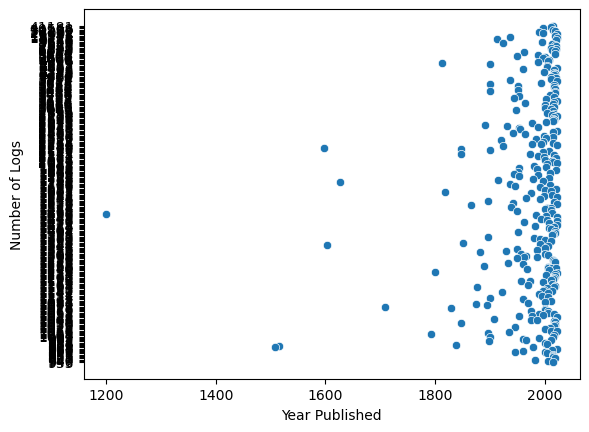

In [165]:
sns.scatterplot(data=books, x="Year Published", y = "Number of Logs")